In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Problem statement

a) Consider the SCM

\begin{align}
    X & := N_X \\
    Y & := 2X+N_Y
\end{align}

with $N_X$ uniformly distributed between 1 and 3 and $N_Y$ uniformly distributed between −0.5 and 0.5 and independent of $N_X$. The distribution $P_{X,Y}$ admits an ANM from X to Y. Draw the support of the joint distribution of X,Y and convince yourself that $P_{X,Y}$ does not admit an ANM from Y to X, that is there is no function g and independent noise variables $M_X$ and $M_Y$ such that

\begin{align}
    X & = g(Y)+M_X \\
    Y & = M_Y
\end{align}

with $M_X$ independent of $M_Y$. 

b) Similarly as in part a), consider the SCM

\begin{align}
    X & :=N_X \\ 
    Y & := X^2 +N_Y
\end{align}

with $N_X$ uniformly distributed between 1 and 3 and $N_Y$ uniformly distributed between −0.5 and 0.5 and independent of $N_X$. Again, draw the support of $P_{X,Y}$ and convince yourself that there is no ANM from Y to X.

# Correction

Sample from the SCM

In [2]:
nb_samples = 1000
Nx = np.random.uniform(low=1, high=3, size=nb_samples)
Ny = np.random.uniform(low=-0.5, high=0.5, size=nb_samples)
X = Nx
Y = 2*X + Ny

Plot samples of $P_{X,Y}$

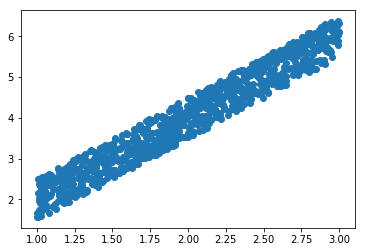

In [3]:
plt.scatter(X,Y)
plt.show()

Let's fit linear models in both directions.

In [4]:
causal_reg = LinearRegression()
causal_reg.fit(X=np.reshape(X, (-1,1)), y=np.reshape(Y, (-1,1)))

anti_causal_reg = LinearRegression()
anti_causal_reg.fit(X=np.reshape(Y, (-1,1)), y=np.reshape(X, (-1,1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
X_causal_reg = [1, 3]
Y_causal_reg = causal_reg.intercept_ + causal_reg.coef_[0]*X_causal_reg

Y_anti_causal_reg = [1.5, 6.5]
X_anti_causal_reg = anti_causal_reg.intercept_ + anti_causal_reg.coef_[0]*Y_causal_reg

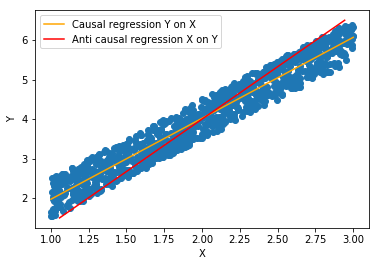

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(X ,Y)
ax.plot(X_causal_reg, Y_causal_reg, color="orange", label="Causal regression Y on X")
ax.plot(X_anti_causal_reg, Y_anti_causal_reg, color="red", label="Anti causal regression X on Y")
plt.xlabel("X")
plt.ylabel("Y")
ax.legend()
plt.show()

The above graph shows that when regressing Y on X, the support of the residuals is constant. This is not the case when regressing X on Y, where the size of the support depends on Y. $P_{X,Y}$ therefore doesn't admit an ANM from Y to X.

The reasonment is the same for part b)